Introduction:

The provided code implements a chatbot using natural language processing techniques and a neural network model. It loads intents data from a JSON file, preprocesses the text data, tokenizes it, builds a neural network model using TensorFlow and Keras, trains the model, and creates a graphical user interface (GUI) using Tkinter for interacting with the chatbot.

Problem Statement:

The goal of this project is to create an interactive chatbot that can understand user input, generate appropriate responses based on the trained model, and provide a user-friendly interface for communication. The chatbot should be able to handle various intents and respond intelligently to user queries or prompts.

Solution:

Data Loading and Preprocessing: The code loads intents data from a JSON file, extracts patterns and tags, converts them into a DataFrame, shuffles the data, and preprocesses the text by removing punctuation and converting to lowercase.

Model Building: It tokenizes the text data, applies padding for uniform input size, encodes the output labels, defines the vocabulary size, and creates a neural network model using an embedding layer, LSTM layer, and dense softmax layer for classification.

Model Training: The model is compiled with appropriate loss and optimizer, and then trained on the preprocessed data for a specified number of epochs.

GUI Development: A Tkinter-based GUI is created for the chatbot, allowing users to interact with the bot by entering text messages. The chatbot processes user input, generates responses using the trained model, and displays the conversation history in the GUI.

Feedback Collection: Upon quitting the chatbot, a feedback form is displayed for users to provide feedback on their experience. The feedback is saved to a CSV file for further analysis.

Enhancements: The chatbot can be further improved by fine-tuning the model, expanding the intents and responses, adding more sophisticated natural language processing techniques, and enhancing the GUI for a more engaging user experience.

Overall, the code provides a comprehensive solution for building and deploying a chatbot with a user-friendly interface and feedback mechanism.

# Importing Libraries

In [1]:
import json
import numpy as np
import nltk
import pandas as pd
import tkinter as tk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import string
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import csv
import os

# Importing the dataset

In [2]:
# Load the intents data from the provided JSON
with open('intents.json', 'r') as f:
    data = json.load(f)

In [3]:
#getting all the data to lists
tag = []
patterns = []
responses = {}

for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        patterns.append(lines)
        tag.append(intent['tag'])

In [4]:
#converting to dataframe
data_lists = pd.DataFrame({'patterns':patterns,'tag':tag})
data_lists

,patterns,tag
0,Hi,greeting
1,Hello,greeting
2,Hey,greeting
3,Can I book a room?,booking
4,How do I make a reservation?,booking
...,...,...
79,Is the beach within walking distance?,beach_access
80,Can I rent beach equipment at the hotel?,beach_access
81,"I lost something at the hotel, what should I do?",lost_and_found
82,Is there a lost and found at the hotel?,lost_and_found


In [5]:
data_lists = data_lists.sample(frac=1)

# Pre-Processing

Preprocessing such as removing punctuations, converting to lower case, encoding the textual data to numerical data are performed.

In [6]:
#removing punctuations
data_lists['patterns'] = data_lists['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data_lists['patterns'] = data_lists['patterns'].apply(lambda wrd: ''.join(wrd))
data_lists

,patterns,tag
40,what are the room service hours,room_service
3,can i book a room,booking
48,what are some local attractions near the hotel,local_attractions
80,can i rent beach equipment at the hotel,beach_access
28,thanks,thankyou
...,...,...
74,is the pool heated,pool
10,can you tell me about your room options,room_types
44,what are the cleaning protocols for the rooms,cleaning
53,what kind of wedding packages do you offer,weddings


TensorFlow's Tokenizer assigns a unique token to each distinct word and padding is done to get all the data to the same length so as to send it to an RNN layer.

In [7]:
#tokenize the data
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(data_lists['patterns'])
train = tokenizer.texts_to_sequences(data_lists['patterns'])

#apply padding
x_train = pad_sequences(train)

#encoding the outputs
le = LabelEncoder()
y_train = le.fit_transform(data_lists['tag'])

In [8]:
input_shape = x_train.shape[1]
print(input_shape)

11


In [9]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  158
output length:  29


# Neural Network

The network cosist of an embedding layer which is one of the most powerful things in the field of natural language processing. The outputs of the embedding layer is the input of the recurrent layer with the LSTM gate. Then the output is flattened and a regular dense layer is used with a softmax activation function.

The main part is the embedding layer which gives a corresponding vector for each word in the dataset.

Why LSTM?

LSTM (Long Short-Term Memory) models are used for making chatbots using .json datasets due to their ability to handle sequential data effectively. In the context of chatbots, LSTM models are beneficial because they can retain information over long sequences, making them suitable for understanding and generating responses in conversations. The use of LSTM models in chatbots allows for better context retention and understanding of the conversation flow, which is crucial for providing coherent and relevant responses to users interacting with the chatbot. Additionally, LSTM models are particularly useful when dealing with dynamic inputs of varying lengths, as they can capture dependencies in the data over time, making them well-suited for chatbot applications where conversations can have different lengths and complexities.

Long Short-Term Memory (LSTM) Model Explanation:

A Long Short-Term Memory (LSTM) model is a type of recurrent neural network (RNN) architecture designed to capture long-term dependencies in sequential data.

Mathematical Concept of LSTM Model:

LSTM Cell Structure:

An LSTM cell consists of three main gates: input gate, forget gate, and output gate, along with a cell state that regulates the flow of information.

Mathematically, the operations within an LSTM cell are defined as:

Input Gate: i_t=σ(W_i.[h_t-1,x_t]+b_i)

where, i_t is the input gate value at time t, W_i is the weight matrix for the input gate, h_t-1 is the previous hidden state, x_t is the current input and b_i is the bias term.

Forget Gate: f_t=σ(W_f.[h_t-1,x_t]+b_f)

where, f_t is the forget gate value at time t, W_f is the weight matrix for the forget gate, h_t-1 is the previous hidden state, x_t is the current input and b_f is the bias term.

Output Gate: o_t=σ(W_o.[h_t-1,x_t]+b_o)

where, o_t is the output gate value at time t, W_o is the weight matrix for the output gate, h_t-1 is the previous hidden state, x_t is the current input and b_o is the bias term.

Cell State: C_t=f_t.C_t-1+i_t.tanh(W_c.[h_t-1,x_t]+b_c)

where, C_t is the cell state at time t, f_t is the forget gate value at time, C_t-1 is the previous cell state, i_t is the input gate value at time t, tanh is the hyperbolic tangent function, W_c is the weight matrix for the cell state update, h_t-1 is the previous hidden state, x_t is the current input and b_c is the bias term.

Hidden State: h_t=o_t.tanh(C_t)

where, h_t is the hidden state at time t, o_t is the output gate value at time t, C_t is the cell state at time t, tanh is the hyperbolic tangent function.

Activation Functions:

Sigmoid Function (σ): σ(x) = 1/(1+e^-x)

where, e is the base of the natural logarithm, and x is the input to the sigmoid function.

Hyperbolic Tangent (tanh): tanh(x) = ((e^2x)-1)/((e^2x)+1)

wheere, e is the base of the natural logarithm, and x is the input to the hyperbolic tangent function.

Working Principle of LSTM Model:

Input Processing: The input sequence is embedded into a continuous vector space using an embedding layer.

LSTM Processing: The LSTM layer processes the embedded sequence, updating the cell state and hidden state at each time step.

Long-Term Memory: The forget gate controls what information to discard from the cell state, allowing the model to remember relevant information over long sequences.

Short-Term Memory: The input gate regulates the flow of new information into the cell state, while the output gate controls the information flow to the hidden state.

Training and Optimization: The model is trained using the sparse categorical crossentropy loss function and the Adam optimizer to minimize the loss and improve accuracy.

Prediction: Once trained, the LSTM model can make predictions on new sequences by processing them through the network and generating output probabilities using the softmax activation function.

In [10]:
#creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)

In [11]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
# training the model
train = model.fit(x_train,y_train,epochs=200) 

Epoch 1/200


3/3 [==============================] - 5s 17ms/step - loss: 3.3687 - accuracy: 0.0476
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 3.3661 - accuracy: 0.0714
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 3.3639 - accuracy: 0.0714
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 3.3619 - accuracy: 0.1071
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 3.3597 - accuracy: 0.1310
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 3.3578 - accuracy: 0.1429
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 3.3555 - accuracy: 0.1429
Epoch 8/200
3/3 [==============================] - 0s 12ms/step - loss: 3.3532 - accuracy: 0.1667
Epoch 9/200
3/3 [==============================] - 0s 13ms/step - loss: 3.3507 - accuracy: 0.1786
Epoch 10/200
3/3 [==============================] - 0s 8ms/step - loss: 3.3480 - accuracy: 0.1905
Epoch 11/200
3/3 [=

3/3 [==============================] - 0s 12ms/step - loss: 0.4602 - accuracy: 0.9167
Epoch 162/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4542 - accuracy: 0.9167
Epoch 163/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4509 - accuracy: 0.9167
Epoch 164/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4462 - accuracy: 0.9167
Epoch 165/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4419 - accuracy: 0.9167
Epoch 166/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4383 - accuracy: 0.9167
Epoch 167/200
3/3 [==============================] - 0s 18ms/step - loss: 0.4327 - accuracy: 0.9167
Epoch 168/200
3/3 [==============================] - 0s 13ms/step - loss: 0.4297 - accuracy: 0.9167
Epoch 169/200
3/3 [==============================] - 0s 14ms/step - loss: 0.4257 - accuracy: 0.9167
Epoch 170/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4213 - accuracy: 0.9167
Epoch 171/200


# Model Analysis

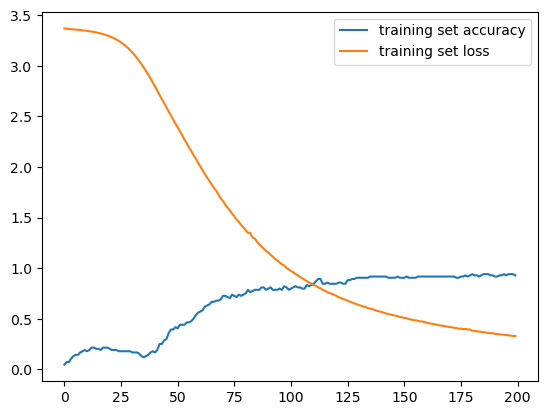

In [13]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

# Testing

Testing the model in a way to mimic a human interacting with a botand got positive results. However, this was very simple because of the small dataset I have used. But the same model can be used for big datasets.

In [14]:
def generate_response(prediction_input):
    texts_p = []
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    if response_tag in responses:
        return random.choice(responses[response_tag])
    else:
        return "I'm sorry, I don't understand what you're saying."

# GUI

In [15]:
# Create a Tkinter-based GUI for the chatbot
class ChatbotGUI:
    def __init__(self):
        self.window = tk.Tk()
        self.window.title("Hotel A.I. Assistant")
        self.window.geometry("800x500")
        self.create_widgets()
        self.show_name_prompt()

    def create_widgets(self):
        self.chat_history = tk.Text(self.window, height=20, width=90)
        self.chat_history.pack(pady=10)
        self.user_input = tk.Entry(self.window, width=80)
        self.user_input.pack(pady=10)
        self.send_button = tk.Button(self.window, text="Send", command=self.send_message)
        self.send_button.pack()
        self.quit_button = tk.Button(self.window, text="Quit", command=self.quit)
        self.quit_button.pack()

    def show_name_prompt(self):
        self.chat_history.insert(tk.END, "Bot: Hello! What's your name?\n")
        self.name_entry = tk.Entry(self.window, width=30)
        self.name_entry.pack(pady=5)
        self.name_button = tk.Button(self.window, text="Enter", command=self.save_name_and_start_chat)
        self.name_button.pack()

    def save_name_and_start_chat(self):
        self.guest_name = self.name_entry.get()
        self.name_entry.destroy()
        self.name_button.destroy()
        self.chat_history.insert(tk.END, f"Bot: Welcome, {self.guest_name}! How can I assist you today?\n")

    def send_message(self):
        user_input = self.user_input.get()
        self.chat_history.insert(tk.END, f"You: {user_input}\n")
        response = generate_response(user_input)
        self.chat_history.insert(tk.END, f"Bot: {response}\n")
        self.user_input.delete(0, tk.END)

    def quit(self):
        self.window.destroy()
        self.show_feedback_form()

    def show_feedback_form(self):
        feedback_window = tk.Tk()
        feedback_window.title("Feedback Form")
        feedback_window.geometry("500x400")
        feedback_label = tk.Label(feedback_window, text="Thank you for using our chatbot. Please provide your feedback:")
        feedback_label.pack(pady=10)
        feedback_options = [("Worst", "worst"), ("Bad", "bad"), ("Average", "average"), ("Good", "good"), ("Very Good", "very good"), ("Outstanding", "outstanding")]
        feedback_var = tk.StringVar()
        for option_text, option_value in feedback_options:
            tk.Radiobutton(feedback_window, text=option_text, variable=feedback_var, value=option_value).pack()
        submit_button = tk.Button(feedback_window, text="Submit", command=lambda: self.submit_feedback(feedback_window, feedback_var.get()))
        submit_button.pack(pady=10)

    def submit_feedback(self, feedback_window, feedback):
        feedback_window.destroy()
        feedback_response = f"Thank you, {self.guest_name}, for your feedback. We are glad you had a {feedback} experience."
        self.show_feedback_response(feedback_response)
        self.save_feedback_to_csv(self.guest_name, feedback)

    def show_feedback_response(self, feedback_response):
        feedback_response_window = tk.Tk()
        feedback_response_window.title("Feedback Response")
        feedback_response_window.geometry("500x400")
        feedback_response_label = tk.Label(feedback_response_window, text=feedback_response)
        feedback_response_label.pack(pady=10)

    def save_feedback_to_csv(self, guest_name, feedback):
        feedback_df = pd.DataFrame({"Name": [guest_name], "Feedback": [feedback]})
        feedback_df.to_csv("feedback.csv", mode="a", index=False, header=not os.path.exists("feedback.csv"))

    def run(self):
        self.window.mainloop()

# Start the chatbot GUI
chatbot_gui = ChatbotGUI()
chatbot_gui.run()

1/1 [==============================] - 0s 17ms/step
